In [221]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from pywaffle import Waffle
%matplotlib inline

In [238]:
titanic_df = pd.read_csv("titanic.csv")
covid_spain = pd.read_csv("worldometer_coronavirus_daily_data.csv")
students_df = pd.read_csv("StudentsPerformance.csv")

In [202]:
covid_spain = covid_spain[covid_spain.country == "Spain"]
covid_spain

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
98976,2020-2-15,Spain,710.0,NaN,708.0,0.0,NaN
98977,2020-2-16,Spain,736.0,26.0,734.0,0.0,NaN
98978,2020-2-17,Spain,764.0,28.0,762.0,0.0,NaN
98979,2020-2-18,Spain,792.0,28.0,790.0,0.0,NaN
98980,2020-2-19,Spain,810.0,18.0,808.0,0.0,NaN
...,...,...,...,...,...,...,...
99503,2021-7-26,Spain,4342054.0,20541.0,564515.0,81268.0,15.0
99504,2021-7-27,Spain,4368453.0,26399.0,585935.0,81323.0,55.0
99505,2021-7-28,Spain,4395602.0,27149.0,610295.0,81396.0,73.0
99506,2021-7-29,Spain,4422291.0,26689.0,632935.0,81442.0,46.0


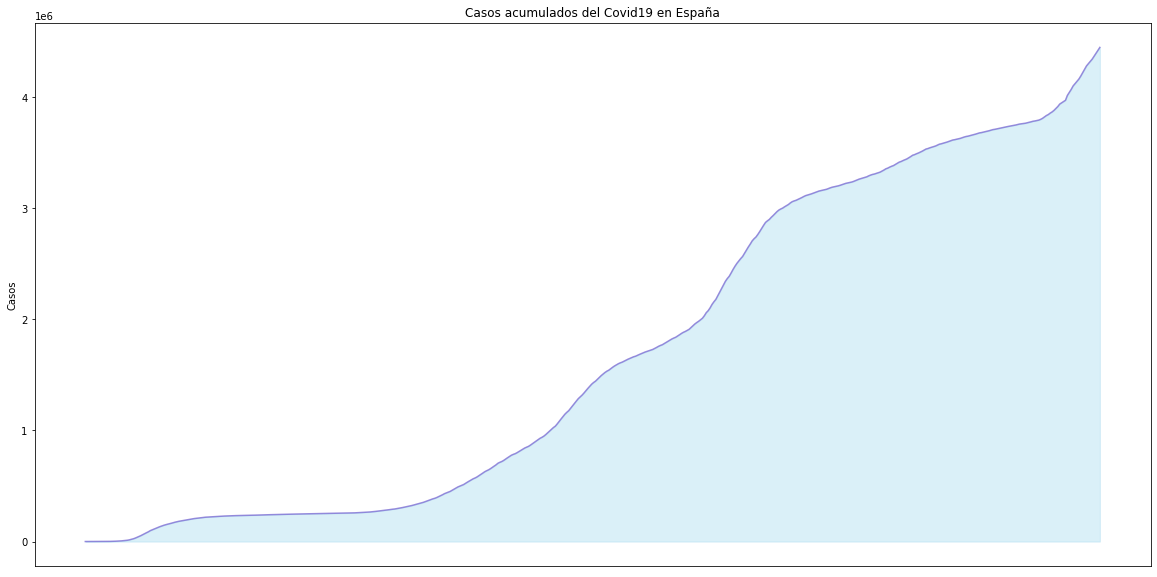

In [219]:
x= covid_spain.date
y = covid_spain.cumulative_total_cases
plt.figure(figsize=(20,10))
plt.fill_between(x,y, color="skyblue", alpha=0.3)
plt.plot(x, y, color="Slateblue", alpha=0.7)

plt.title("Casos acumulados del Covid19 en España")
plt.xlabel("Fecha")
plt.ylabel("Casos")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
survivals = df.PassengerId[df.Survived == 1]
females = df[df.Sex == "female"]
class1 = df[df.Pclass == 1]

In [107]:
class1females = class1[class1.Sex == "female"]
class1Surviving = class1[class1.Survived == 1]
femalesSurviving = females[females.Survived == 1]
femalesSurviving.shape[0]
class1FemalesSurviving = femalesSurviving[malesSurviving.Pclass == 1]

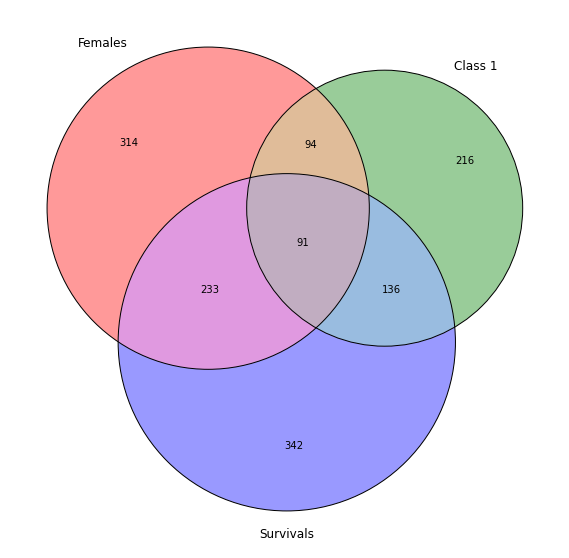

In [290]:
plt.figure(figsize=(20,10))
subsets = (females.shape[0], class1.shape[0],class1females.shape[0],survivals.shape[0],femalesSurviving.shape[0],class1Surviving.shape[0],class1FemalesSurviving.shape[0])
venn3(subsets, set_labels=("Females", "Class 1", "Survivals"))
venn3_circles(subsets, alpha=1, linestyle="-", linewidth=1)


In [244]:
students_df

reading_scores =students_df["reading score"]

In [260]:
outstanding = reading_scores[reading_scores >= 90]
notable = reading_scores[(reading_scores >=70) & (reading_scores <90)]
good = reading_scores[(reading_scores >= 50) & (reading_scores <70)]
didnt_pass = reading_scores[reading_scores < 50]

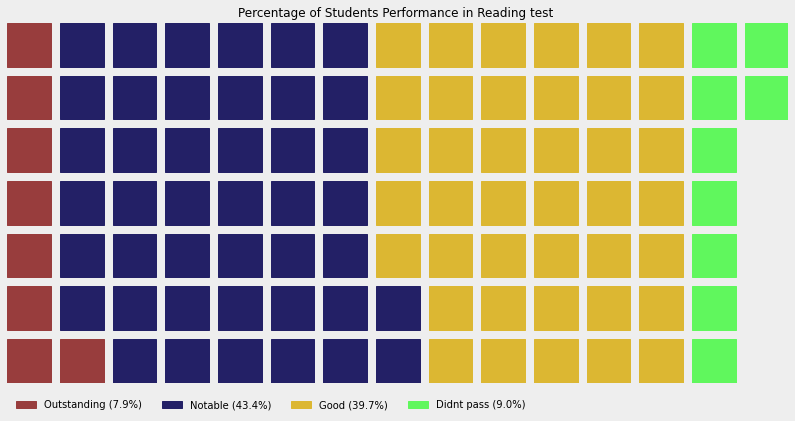

In [287]:
data = {'Outstanding': outstanding.shape[0] / reading_scores.shape[0] * 100, 'Notable': notable.shape[0]/ reading_scores.shape[0] * 100, 
        'Good': good.shape[0]/ reading_scores.shape[0]*100 ,'Didnt pass': didnt_pass.shape[0]/ reading_scores.shape[0]*100}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=7, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732", "#60F75D"),
    title={'label': 'Percentage of Students Performance in Reading test ', 'loc': 'center'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.1), 'ncol': len(data), 'framealpha': 0},
    starting_location='NW',
    block_arranging_style='snake',
    tight=False,
    figsize=(14, 8)
)
fig.set_facecolor('#EEEEEE')
plt.show()